In [1]:
import pandas as pd
%matplotlib inline

In [2]:
exp = pd.read_pickle("lca.pickle")
ref = pd.read_pickle("irceline.pickle")

In [3]:
ref = ref.droplevel(2, axis=1).resample("1H").first()

In [4]:
exp = exp.pivot_table(index='timestamp', columns=['location_abb', 'sensor_id'],
                      values=['P1', 'P2', 'temperature', 'humidity'])\
         .resample("1H").mean()
exp = exp.droplevel(2, axis=1).swaplevel(axis=1).sort_index(axis=1)

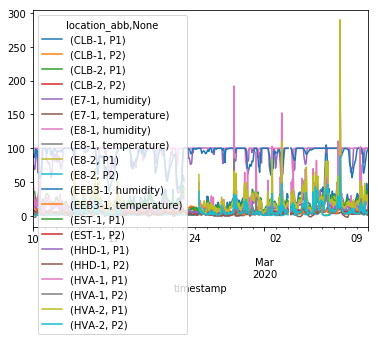

In [5]:
exp.plot()

In [6]:
def rdt(out):
    """
    Computer Filter Yield
    """
    return out.count()/out.shape[0]

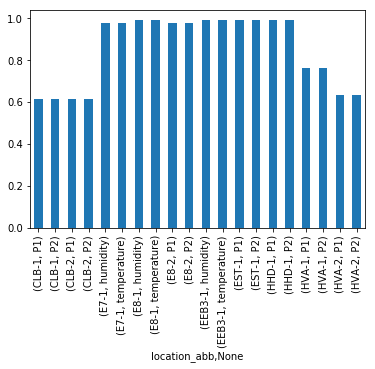

In [10]:
rdt(exp).plot(kind='bar')

In [8]:
ref.size

15334

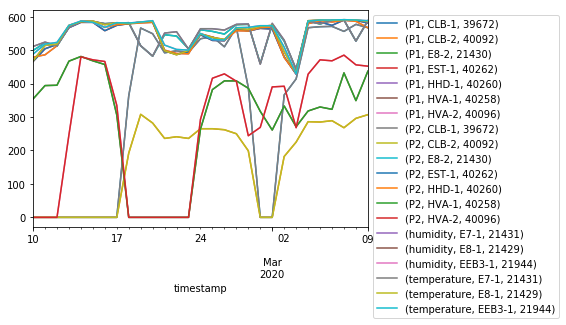

In [16]:
exp = pd.read_pickle("lca.pickle")
axe = exp.pivot_table(index='timestamp', columns=['location_abb', 'sensor_id'],
                      values=['P1', 'P2', 'temperature', 'humidity'])\
         .resample("1D").count().plot()
axe.legend(bbox_to_anchor=(1,1))